## 4.9 - Intro to Data Visualization with Python

### Content List
#### 1. Import Libraries
#### 2. Import Data
#### 3. Bar Charts
#### 4. Histograms
#### 5. Scatterplot
#### 6. Sampling Data

### 1. Import Libraries

In [1]:
#Import Libaries for Data Analysis and Data Visualization
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

### 2. Import Data

In [2]:
#Create folder path
path = r'C:\Users\Utilizador\OneDrive\Documents\CareerFoundry - Data Analyst\Data Immersion\A4\19-01-2024 Instacart Basket Analysis'

In [3]:
#Import data exported in task 4.8
ords_prods_merge = pd.read_pickle (os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_aggr.pkl'))

In [4]:
#Check output
ords_prods_merge.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,is_first_order,product_id,add_to_cart_order,reordered,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_order_price,spending_flag,order_behavior,order_frequecy
0,2539329,1,1,2,8,NaN,1,196,1,0,...,Mid-range product,Regularly busy,Regular days,Most orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer
1,2398795,1,2,3,7,15.0,0,196,1,1,...,Mid-range product,Regularly busy,Slowest days,Most orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer
2,473747,1,3,3,12,21.0,0,196,1,1,...,Mid-range product,Regularly busy,Slowest days,Average orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer
3,2254736,1,4,4,7,29.0,0,196,1,1,...,Mid-range product,Least busy,Slowest days,Most orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer
4,431534,1,5,4,15,28.0,0,196,1,1,...,Mid-range product,Least busy,Slowest days,Average orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer


In [5]:
#check shape
ords_prods_merge.shape

(32404859, 25)

### 3. Bar Charts

<Axes: xlabel='orders_day_of_week'>

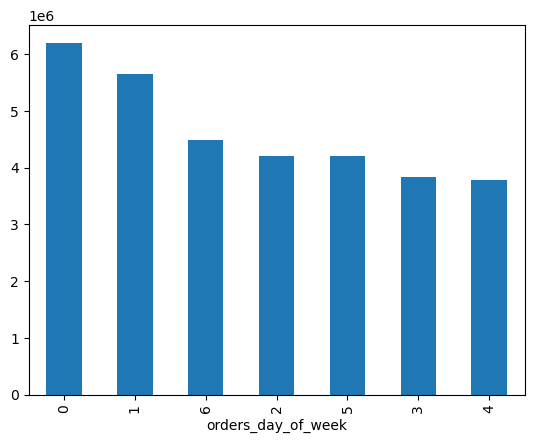

In [6]:
#Create a bar chart
ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

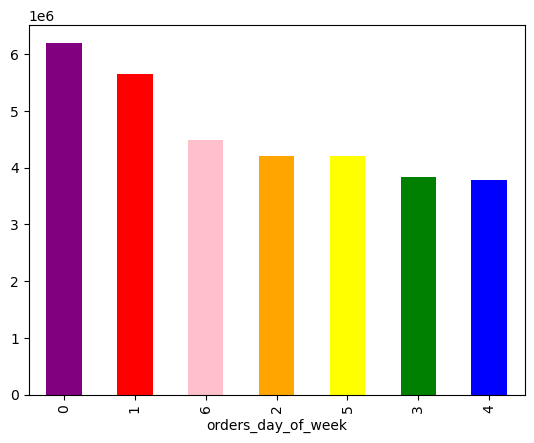

In [7]:
#Add colour to the bar chart
bar=ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color =['purple','red','pink','orange','yellow','green','blue'])

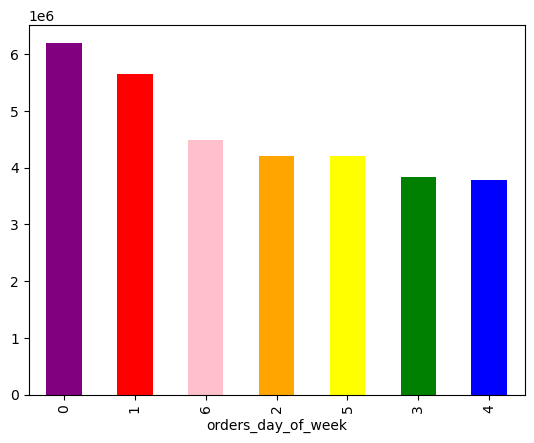

In [8]:
bar.figure

In [9]:
#Export Bar chart
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

### 4. Histograms

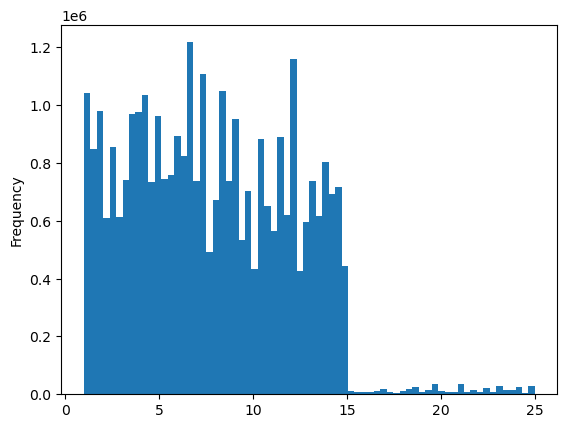

In [10]:
#Create a Histogram
hist=ords_prods_merge['prices'].plot.hist(bins = 70)

In [11]:
#Export Histogram
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices.png'))

### 5. Scatterplot

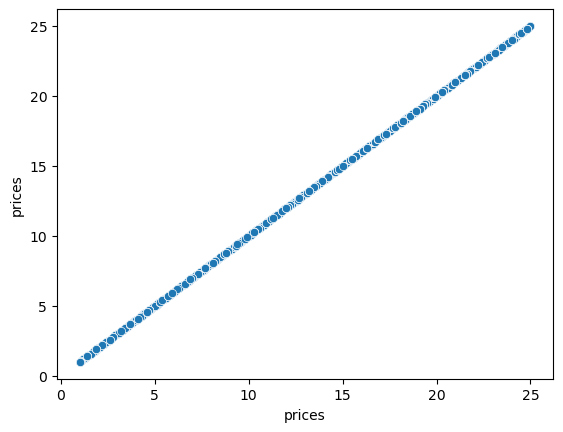

In [12]:
Scatter = sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

### 6. Sampling Data

In [13]:
np.random.seed(4)

In [14]:
#Create a list holding True/False values to the test np.random.rand(len(ords_prods_merge)) <= 0.7
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [15]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [16]:
#Store 70% of the dataframe in the sample big
big = ords_prods_merge[dev]

In [17]:
#Store 30% of the dataframe in the sample small
small = ords_prods_merge[~ dev]

In [18]:
big.shape

(22683761, 25)

In [19]:
small.shape

(9721098, 25)

In [20]:
#Create new dataframe of small sample with only the columns needed for the line chart
df_2 = small [['orders_day_of_week', 'prices']]

C:\Users\Utilizador\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Utilizador\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


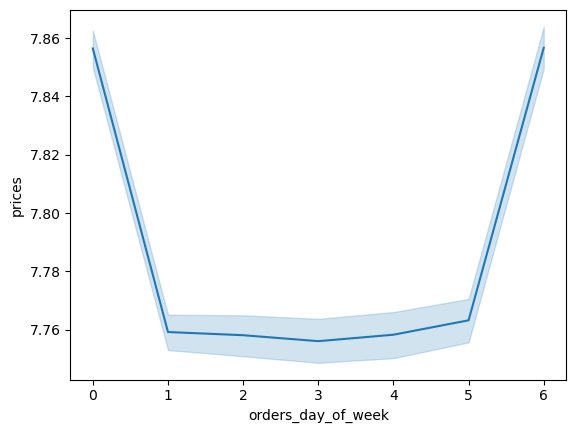

In [22]:
#Create line chart displaying orders_day_of_week and prices
line = sns.lineplot(data =df_2, x = 'orders_day_of_week', y ='prices')

In [24]:
#Export Line Chart
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_chart_prices_dow.png'))